(1, 30)
17.011125482510625


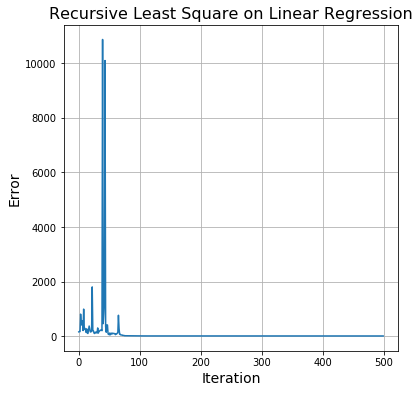

In [3]:
##Recursive Least Square solution
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Number of data and dimensions
N,p = 500,30
#Input data
X = np.random.randn(N,p)
#True parameters
wTrue = np.random.randn(p,1)
#Set up traget 
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)

#Initial guess and error
w0 = np.random.randn(p,1)

MaxIter = 500
Eplot = np.zeros((MaxIter,1))
wIter = w0
j = np.floor(np.random.rand()*N).astype(int) #dtype()返回数据元素的类型，astype改变所有元素的数据类型
lamda = 0.99
x0 = np.array([X[j,:]])
print(x0.shape)
pj = np.linalg.inv(x0.T @ x0)
wIter = w0
for iter in range(MaxIter):
    #j = np.floor(np.random.rand()*N).astype(int) 
    j = iter
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    kj = ((1/lamda)*pj@xj) / (1+(1/lamda)*xj.T@pj@xj)
    error = yj - (wIter.T@xj)
    wIter = wIter + kj*error
    pj = (1/lamda)*pj - (1/lamda)*kj@xj.T@pj
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
print(np.linalg.norm(yTarget - X @ wIter))
#print(Eplot)
fig,ax = plt.subplots(figsize = (6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize = 14)
ax.set_ylabel("Error",fontsize = 14)
ax.grid(True)
ax.set_title("Recursive Least Square on Linear Regression",fontsize = 16)
plt.savefig("E:\\Southampton University\\Reinforcement Learning\\Labs\\Lab1\\RLSCurve1.png")

(1, 100)
60.339569706773695


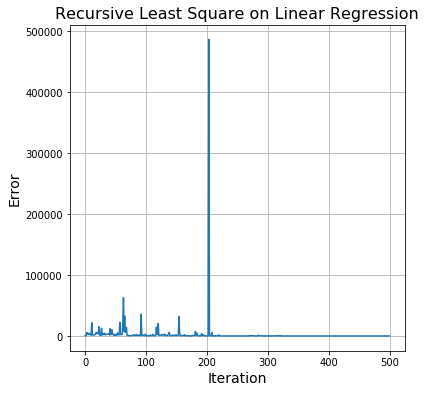

In [20]:
##Recursive Least Square solution
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Number of data and dimensions
N,p = 500,100
#Input data
X = np.random.randn(N,p)
#True parameters
wTrue = np.random.randn(p,1)
#Set up traget 
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)

#Initial guess and error
w0 = np.random.randn(p,1)

MaxIter = 500
Eplot = np.zeros((MaxIter,1))
wIter = w0
j = np.floor(np.random.rand()*N).astype(int) #dtype()返回数据元素的类型，astype改变所有元素的数据类型
lamda = 0.9
x0 = np.array([X[j,:]])
print(x0.shape)
pj = np.linalg.inv(x0.T @ x0)
wIter = w0
for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int) #dtype()返回数据元素的类型，astype改变所有元素的数据类型
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    kj = ((1/lamda)*pj@xj) / (1+(1/lamda)*xj.T@pj@xj)
    error = yj - (wIter.T@xj)
    wIter = wIter + kj*error
    pj = (1/lamda)*pj - (1/lamda)*kj@xj.T@pj
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
print(np.linalg.norm(yTarget - X @ wIter))
#print(Eplot)
fig,ax = plt.subplots(figsize = (6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize = 14)
ax.set_ylabel("Error",fontsize = 14)
ax.grid(True)
ax.set_title("Recursive Least Square on Linear Regression",fontsize = 16)
plt.savefig("E:\\Southampton University\\Reinforcement Learning\\Labs\\Lab1\\RLSCurved100.png")

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv',sep=';')
print(df.shape)
X = np.array(df)
print(X[:,-1])


(4898, 12)
[6. 6. 6. ... 6. 7. 6.]


In [13]:
from sklearn import preprocessing
yTarget = np.array([X[:,-1]]).T
X = X[:,:11]
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
yTarget = min_max_scaler.fit_transform(yTarget)
#X = preprocessing.scale(X)
#yTarget = preprocessing.scale(yTarget)
print(X.shape)
print(yTarget.shape)

(4898, 11)
(4898, 1)


10.097986033886361
[[24.27860877]
 [24.06613731]
 [23.11695268]
 ...
 [10.0497506 ]
 [ 9.88145797]
 [10.09798603]]


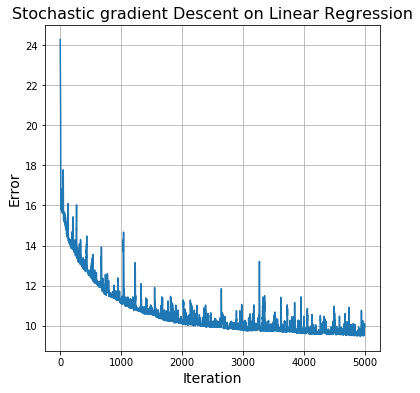

In [18]:
##Stochastic Gradient Descent on Linear Regression
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
[N,p] = X.shape
#Initial guess and error
w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0)

MaxIter = 5000
lRate = 0.1
Eplot = np.zeros((MaxIter,1))

wIter = w0
for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int) #dtype()返回数据元素的类型，astype改变所有元素的数据类型
    xj = X[j,:]
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    yPred = xj.T @ wIter
    wIter = wIter - lRate * (yPred - yj) * xj
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)

print(np.linalg.norm(yTarget - X @ wIter))
print(Eplot)
fig,ax = plt.subplots(figsize = (6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize = 14)
ax.set_ylabel("Error",fontsize = 14)
ax.grid(True)
ax.set_title("Stochastic gradient Descent on Linear Regression",fontsize = 16)
plt.savefig("E:\\Southampton University\\Reinforcement Learning\\Labs\\Lab1\\SGDdataCurve.png")
    

(4898, 11)
13.054774794339703
[[64.14546931]
 [62.97523589]
 [61.73733579]
 ...
 [13.04937554]
 [13.05123971]
 [13.05477479]]


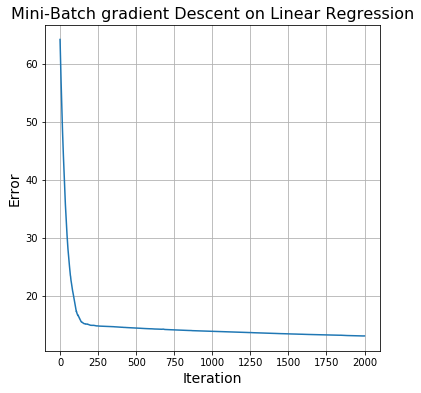

In [15]:
##Stochastic Gradient Descent on Linear Regression(Minibatch)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
[N,p] = X.shape
#Initial guess and error
w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0)

MaxIter = 2000
lRate = 0.001
Eplot = np.zeros((MaxIter,1))
minerror = 10**8
wIter = w0
print(X.shape)
for iter in range(MaxIter):
    j = np.floor(np.random.rand()*N).astype(int) #dtype()返回数据元素的类型，astype改变所有元素的数据类型
    #if(iter % 100 == 0):
       #print(j)
    xj = X[j:j+24,:].T
    #xj = np.array([X[j:j+20,:]]).T
    yj = yTarget[j:j+24,:]
    yPred = xj.T @ wIter
    wIter = wIter - lRate * xj @ (yPred - yj)
    error = np.linalg.norm(yTarget - X @ wIter)
    Eplot[iter] = error

print(np.linalg.norm(yTarget - X @ wIter))
print(Eplot)
fig,ax = plt.subplots(figsize = (6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize = 14)
ax.set_ylabel("Error",fontsize = 14)
ax.grid(True)
ax.set_title("Mini-Batch gradient Descent on Linear Regression",fontsize = 16)
plt.savefig("E:\\Southampton University\\Reinforcement Learning\\Labs\\Lab1\\SGDMinibatchondata.png")
    

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv',sep=';')
print(df.shape)
X = np.array(df)
print(X[:,-1])

(4898, 12)
[6. 6. 6. ... 6. 7. 6.]


In [10]:
yTarget = np.array([X[:,-1]]).T
X = X[:,:11]
from sklearn import preprocessing
#X = preprocessing.scale(X)
#yTarget = preprocessing.scale(yTarget)
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
yTarget = min_max_scaler.fit_transform(yTarget)

(11, 11)
19.500997182610423


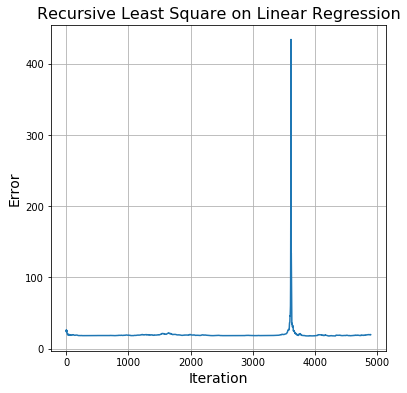

In [11]:
##Recursive Least Square solution
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
MaxIter = 4898
Eplot = np.zeros((MaxIter,1))

[N,p] = X.shape
#Initial guess and error
w0 = np.random.randn(p,1)
j = np.floor(np.random.rand()*N).astype(int) #dtype()返回数据元素的类型，astype改变所有元素的数据类型
lamda = 0.99
x0 = np.array([X[j,:]])
print((x0.T@x0).shape)
#pj = np.linalg.inv(x0.T @ x0)
pj = np.ones((p,p)) * np.random.randn(1)
wIter = w0
for iter in range(MaxIter):
    #j = np.floor(np.random.rand()*N).astype(int) #dtype()返回数据元素的类型，astype改变所有元素的数据类型
    j = iter
    xj = np.array([X[j,:]]).T
    yj = yTarget[j,:]
    kj = ((1/lamda)*pj@xj) / (1+(1/lamda)*xj.T@pj@xj)
    error = yj - (wIter.T@xj)
    wIter = wIter + kj*error
    pj = (1/lamda)*pj - (1/lamda)*kj@xj.T@pj
    Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)
print(np.linalg.norm(yTarget - X @ wIter))
#print(Eplot)
fig,ax = plt.subplots(figsize = (6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize = 14)
ax.set_ylabel("Error",fontsize = 14)
ax.grid(True)
ax.set_title("Recursive Least Square on Linear Regression",fontsize = 16)
plt.savefig("E:\\Southampton University\\Reinforcement Learning\\Labs\\Lab1\\RLSdataCurved.png")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
mod = sm.RecursiveLS(yTarget,X)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4898
Model:                    RecursiveLS   Log Likelihood               -6185.091
Date:                Mon, 17 Feb 2020   R-squared:                       0.282
Time:                        12:23:44   AIC                          12392.183
Sample:                             0   BIC                          12463.645
                               - 4898   HQIC                         12417.255
Covariance Type:            nonrobust   Scale                            0.720
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0624      0.020      3.138      0.002       0.023       0.101
x2            -0.2120      0.013    -16.368      0.000      -0.237      -0.187
x3             0.0030      0.013      0.231      0.8

[ 0.00131994 -0.02741445  0.01638342 ...  0.06252152  0.06236514
  0.06242977]


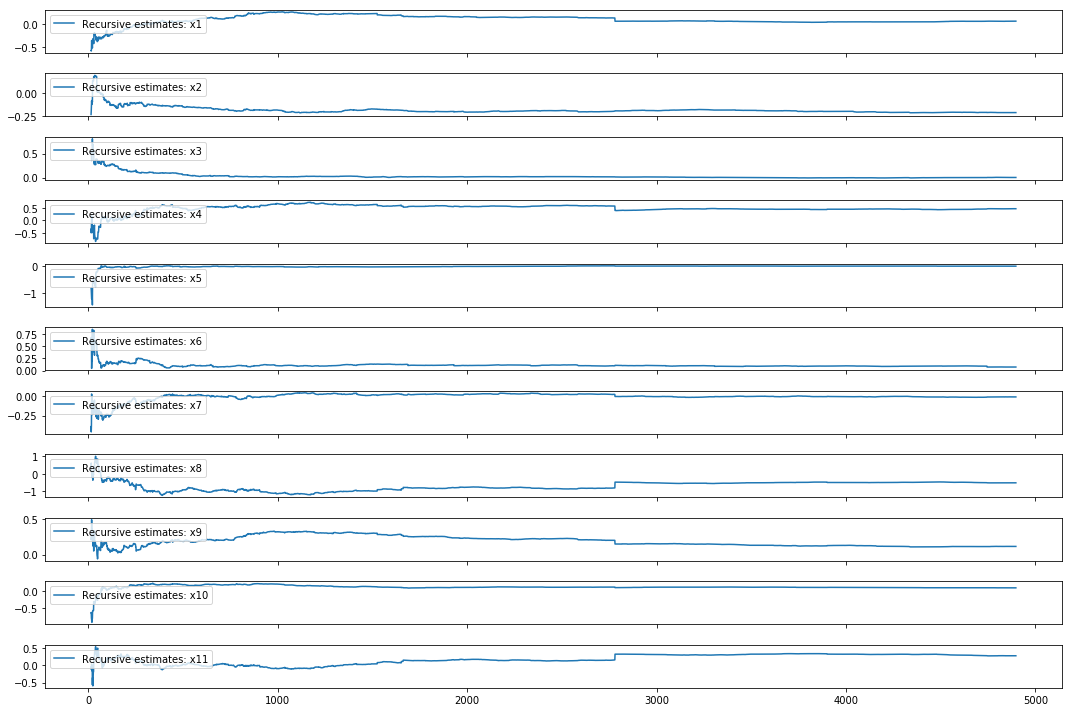

In [9]:
print(res.recursive_coefficients.filtered[0])
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(15,10));

In [7]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
df = pd.read_csv('data.csv',sep=';')
print(df.shape)
X = np.array(df)
print(X[:,-1])
yTarget = np.array([X[:,-1]]).T
X = X[:,:11]
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
yTarget = min_max_scaler.fit_transform(yTarget)

(4898, 12)
[6. 6. 6. ... 6. 7. 6.]


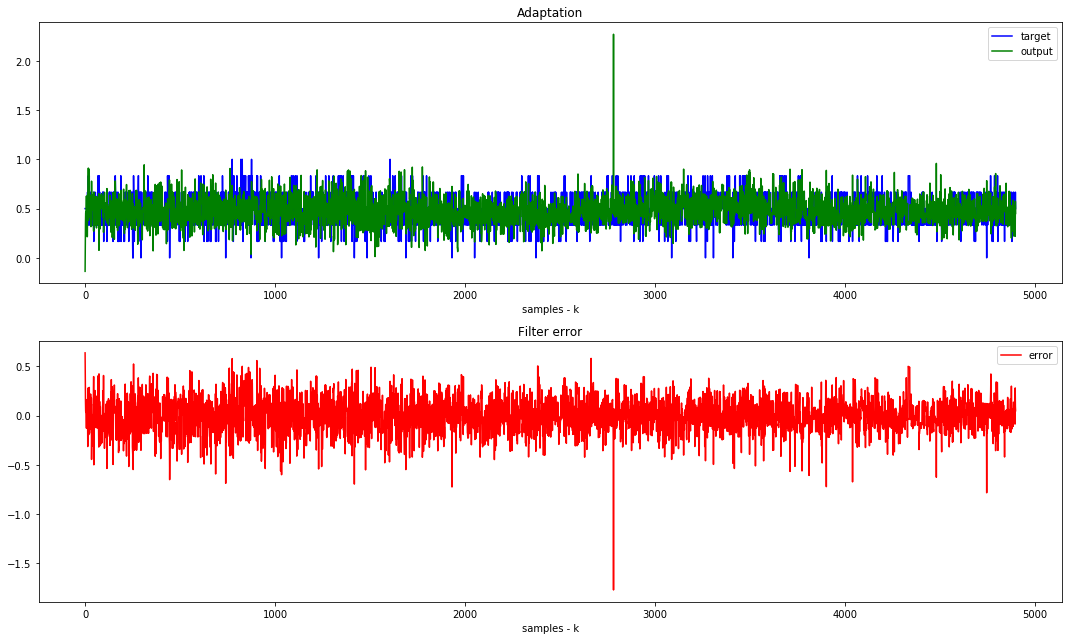

15.257891869681691


In [8]:
import padasip as pa
[N,p] = X.shape
f = pa.filters.FilterRLS(n=p, mu=0.99, w="random")
y, e, w = f.run(yTarget, X)
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(yTarget,"b", label="target")
plt.plot(y,"g", label="output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(e,"r", label="error");plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig("E:\\Southampton University\\Reinforcement Learning\\Labs\\Lab1\\RLSdataCurved.png")
print(sum(e))